In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16,activation="relu",name="layer1"), # you can put name to the layers
    Dense(16,activation="relu"),
    Dense(10),
    Softmax()
])


In [4]:
# Print the model summary

model.weights

[<tf.Variable 'layer1/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[-0.08565572,  0.03871509,  0.02884649, ...,  0.06276733,
          0.08308594, -0.06538604],
        [-0.03068904,  0.02756897,  0.06161681, ...,  0.07064104,
         -0.03894484,  0.07526749],
        [ 0.03767819,  0.08499153, -0.06482393, ...,  0.05559015,
          0.04892556, -0.04017674],
        ...,
        [ 0.04413089,  0.08185822, -0.03237856, ..., -0.033819  ,
          0.03417116, -0.01518751],
        [-0.06439607, -0.01963718,  0.05762234, ..., -0.01722615,
          0.07367058,  0.02578107],
        [ 0.03478386, -0.02365831, -0.06481555, ...,  0.08111651,
          0.02636127, -0.06682473]], dtype=float32)>,
 <tf.Variable 'layer1/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[-3.17510247e-01, -2.79726148e-01, -3.47685963e-01

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer1 (Dense)               (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [7]:
# Build the Sequential convolutional neural network model

model = Sequential()
model.add(Conv2D(16,(3,3),activation="relu",input_shape=(28,28,1),data_format="channels_last"))
model.add(MaxPooling2D(pool_size=3,data_format="channels_last"))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [8]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [9]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=[acc,mae])


In [10]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7fcaf45f9470>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7fcaf45f93c8>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [12]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [13]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [14]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [15]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/255.0
test_images = test_images/255.0

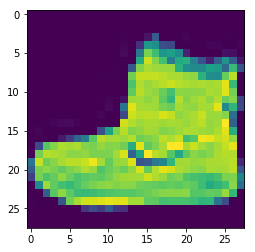

Label: Ankle boot


In [16]:
# Display one of the images
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"Label: {labels[train_labels[i]]}")

#### Fit the model

In [17]:
# Fit the model
history = model.fit(train_images[...,np.newaxis],train_labels,epochs=3,batch_size=256)


Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 54s 906us/sample - loss: 0.5575 - sparse_categorical_accuracy: 0.8053 - mean_absolute_error: 4.4200
Epoch 2/3
60000/60000 [==============================] - 51s 852us/sample - loss: 0.3731 - sparse_categorical_accuracy: 0.8697 - mean_absolute_error: 4.4200
Epoch 3/3
60000/60000 [==============================] - 51s 855us/sample - loss: 0.3382 - sparse_categorical_accuracy: 0.8810 - mean_absolute_error: 4.4200


#### Plot training history

In [18]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
print(df.columns)

Index(['loss', 'sparse_categorical_accuracy', 'mean_absolute_error'], dtype='object')


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

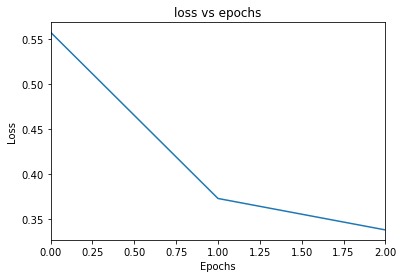

In [19]:
# Make a plot for the loss

loss_plot = df.plot(y="loss",title = "loss vs epochs",legend = False)
loss_plot.set(xlabel = "Epochs",ylabel="Loss")

[Text(0, 0.5, "'sparse_categorical_accuracy'"), Text(0.5, 0, 'epochs')]

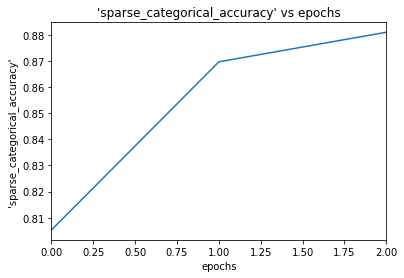

In [20]:
# Make a plot for the accuracy
sca_plot = df.plot(y="sparse_categorical_accuracy",title = "'sparse_categorical_accuracy' vs epochs",legend = False)
sca_plot.set(xlabel = "epochs",ylabel="'sparse_categorical_accuracy'")


[Text(0, 0.5, 'mean_absolute_error'), Text(0.5, 0, 'epochs')]

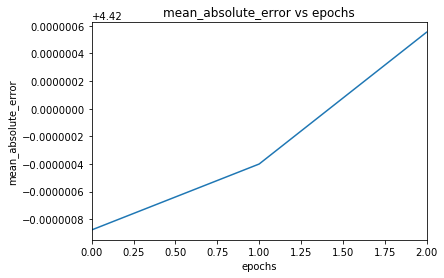

In [21]:
# Make a plot for the additional metric

# Make a plot for the accuracy
sca_plot = df.plot(y="mean_absolute_error",title = "mean_absolute_error vs epochs",legend = False)
sca_plot.set(xlabel = "epochs",ylabel="mean_absolute_error")

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [22]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [27]:
# Evaluate the model
testLoss, testAcc, testMae = model.evaluate(test_images[...,np.newaxis],test_labels,verbose = 2)
print(f"Loss:{testLoss} \nAccuracy:{testAcc} \nMeanAvgError:{testMae}")


10000/1 - 5s - loss: 0.3372 - sparse_categorical_accuracy: 0.8771 - mean_absolute_error: 4.4200
Loss:0.3492493664741516 
Accuracy:0.8770999908447266 
MeanAvgError:4.419997215270996


#### Make predictions from the model

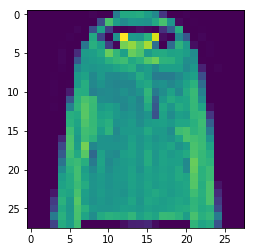

Label: Coat


In [24]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [29]:
# Get the model predictions
# batch of images for the first dimentions and the number of channels for the last dimention
# add dummy variables 
preds = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Prediction: {labels[np.argmax(preds)]}")

Prediction: Coat
